In [1]:
import matplotlib.pylab as plt
import numpy as np
import os
import subprocess
import time

from subprocess import Popen, PIPE, STDOUT

# Basic test

Use grep to see whereas you have all python tools

Grep the items that contains `f`

In [2]:
p = Popen(['grep', 'f'], stdout=PIPE, stdin=PIPE, stderr=STDOUT)    
grep_stdout = p.communicate(input=b'one\ntwo\nthree\nfour\nfive\nsix\n')[0]
print(grep_stdout.decode())

four
five



# Ocaml test

For all scripts:

- Receive digit => Perform calculation and return result
- Exit => End the program correctly

### Send all the information in one pack

Observation:

1. First lines contains the results (strings generated by Ocaml program)
2. Last lines are inputs sent

##### With `exit` keyword

In [3]:
p = Popen(['./script_1.out'], stdout=subprocess.PIPE, stdin=subprocess.PIPE, stderr=subprocess.STDOUT)    
ocaml_stdout = p.communicate(input=b'4\n5\n6\n7\nexit\n7\nsix\n')[0]

print(ocaml_stdout.decode())
p.terminate()

Print integer or exit
4 => 5, 
5 => 6, 
6 => 7, 
7 => 8, 
4
5
6
7



##### Without `exit` keyword

Will raise an error

In [4]:
p = Popen(['./script_1.out'], stdout=subprocess.PIPE, stdin=subprocess.PIPE, stderr=subprocess.STDOUT)    
grep_stdout = p.communicate(input=b'4\n5\n6\n7\n')[0]
p.terminate()
print(grep_stdout.decode())


Print integer or exit
4 => 5, 
5 => 6, 
6 => 7, 
7 => 8, 
4
5
6
7
Fatal error: exception End_of_file



---

# Liveliness

Keeping subprocess alive.

Do not use `communicate()` method, as the program will return.

[Source](https://stackoverflow.com/questions/47502326/keep-a-subprocess-alive-and-keep-giving-it-commands-python-3?noredirect=1&lq=1)

##### Send data interactively

The programs make the sum of the past digits.

We need to get 3 lines at each call:

1. Total in memory
2. Value added 
3. Input

In [5]:
process = Popen(['./script_2.out'], stdout=subprocess.PIPE, stdin=subprocess.PIPE, stderr=subprocess.STDOUT)    

# Should start with 'Hello\n'
print(process.stdout.readline().decode(), end="") #

#print(repr(process.stdout.readline())) # Should print 'Hello\n'
        
for i in range(10):
    print("======================")
    vx = input("INPUT to fed: ")
    
    if vx.isdigit():
        process.stdin.write(bytes(vx+"\n", "utf8"))
        process.stdin.flush()

        # Blocking, do not use
        #lines = process.stdout.readlines()
        #print(lines)
        # Need 3 lines to gather all is sent
        print(process.stdout.readline().decode(), end="") #
        print(process.stdout.readline().decode(), end="") #
        print(process.stdout.readline().decode(), end="") #
        
        
    elif vx == "exit":
        break
        
process.stdin.write(b"exit\n")
process.stdin.flush()
print(repr(process.stdout.readline())) # Should print 'Hello\n'        

Print integer or exit
INPUT to fed: 3
Total: 3, 
3 => 4, 
3
INPUT to fed: 10
Total: 13, 
10 => 11, 
10
INPUT to fed: 4
Total: 17, 
4 => 5, 
4
INPUT to fed: exit
b''


##### Test to send several messages in a row

In [6]:
# Number of input to process
n = 10000

In [7]:
process = Popen(['./script_2.out'], stdout=subprocess.PIPE, stdin=subprocess.PIPE, stderr=subprocess.STDOUT)    

T_lst = []

# Should start with 'Hello\n'
print(process.stdout.readline().decode(), end="") #

#print(repr(process.stdout.readline())) # Should print 'Hello\n'
        
for i in range(n):
    t1 = time.time()
    process.stdin.write(bytes("{}\n".format(i), "utf8"))
    t2 = time.time()
    process.stdin.flush()
    t3 = time.time()

    
    st1 = process.stdout.readline()
    t4 = time.time()
    
    T_lst.append([t1, t2, t3, t4])
    
    # Gather additional outputs
    process.stdout.readline() 
    process.stdout.readline()
    
T_lst = np.array(T_lst)
T_lst = (T_lst.T - T_lst[:, 0]).T    
    
process.stdin.write(b"exit\n")
process.stdin.flush()
print(repr(process.stdout.readline())) # Should print 'Hello\n'
        

Print integer or exit
b''


In [8]:
# Display factor, here in microseconds
F = 10**6
label = "micro sec"

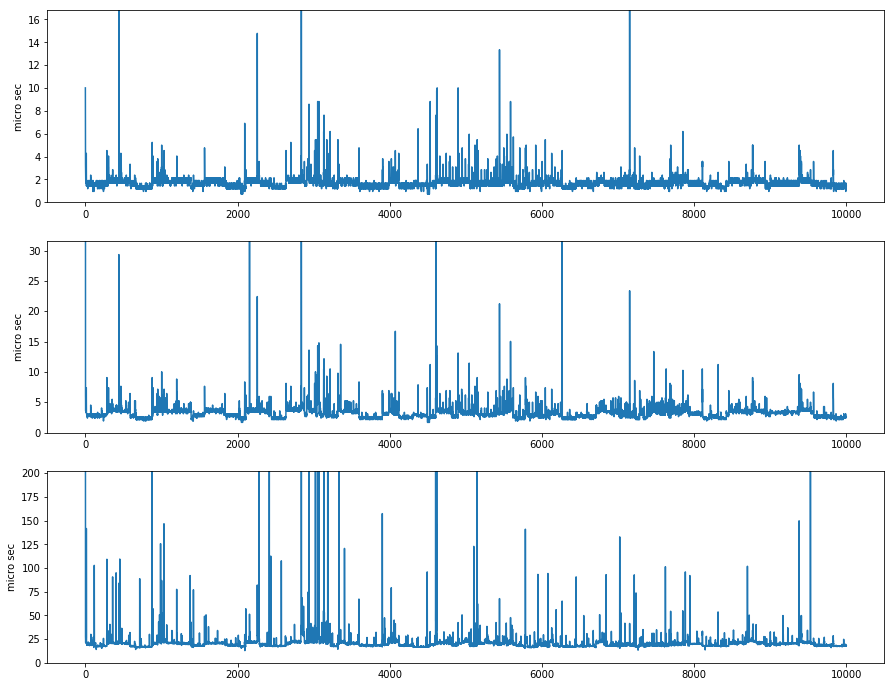

In [9]:
s1 = len(T_lst.T) -1

fig, ax = plt.subplots(s1, figsize=(15, 4*s1))
for idx, ttt in enumerate(T_lst.T[1:]):
    ax[idx].plot(ttt[:]*F)
    ax[idx].set_ylim(0, ttt[-1000:].mean() * F * 10)
    ax[idx].set_ylabel(label);

#### Compare with python loop

In [10]:
tot = 0
t_lst = []
for i in range(n):
    t1 = time.time()
    tot += i
    t2 = time.time()
    t_lst.append(t2-t1)

t_lst = np.array(t_lst)

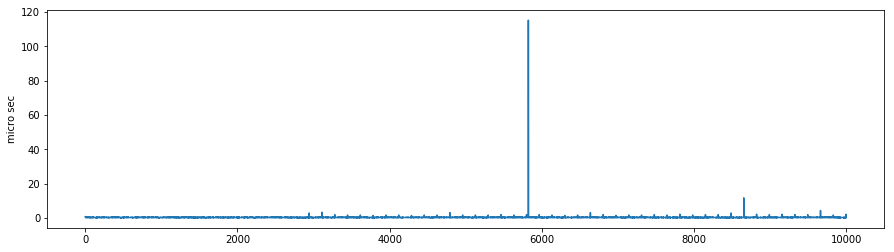

In [11]:
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(t_lst * F)
ax.set_ylabel(label);

Complexity is $\mathcal{O}(1)$

---

## Test Costly function Ocaml VS Python

### Test costly function

In [12]:
n = 50000

##### Python Loop test

In [13]:
def costly_fx0(i):
    """ 1 + 2 + 3 + ... + i-1
    """
    tot = 0
    for j in range(i):
        tot += j
    return tot

def costly_fx1(i):
    """Just add 1 together
    """
    tot = 0
    for _ in range(i):
        tot += 1
    return tot

In [14]:
tot = 0
t_lst = []
for i in range(n):
    t1 = time.time()
    costly_fx1(i)
    t2 = time.time()
    t_lst.append(t2-t1)

t_lst = np.array(t_lst)

##### Python results

You can see that the complexity increase a lot with increasing index !!

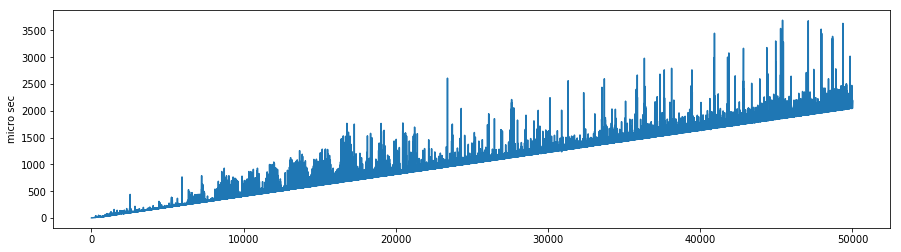

In [15]:
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(t_lst * F)
ax.set_ylabel(label);

##### Ocaml single test

May return identity

Do $f(4) = 1 + 1 + 1 + 1$

In [16]:
process = Popen(['./script_3.out'], stdout=subprocess.PIPE, stdin=subprocess.PIPE, stderr=subprocess.STDOUT)    

# Should start with 'Hello\n'
print(process.stdout.readline().decode(), end="") #

#print(repr(process.stdout.readline())) # Should print 'Hello\n'
        
for i in range(10):
    vx = input("INPUT to fed: ")
    
    if vx.isdigit():
        process.stdin.write(bytes(vx+"\n", "utf8"))
        process.stdin.flush()

        print(process.stdout.readline().decode(), end="") #
        print(process.stdout.readline().decode(), end="") #
        
        
    elif vx == "exit":
        break
        
process.stdin.write(b"exit\n")
process.stdin.flush()
print(repr(process.stdout.readline())) # Should print 'Hello\n'
        

Print integer or exit
INPUT to fed: 2
2 => 2, 
2
INPUT to fed: 10
10 => 10, 
10
INPUT to fed: 100
100 => 100, 
100
INPUT to fed: exit
b''


##### Automatic

In [17]:
process = Popen(['./script_3.out'], stdout=subprocess.PIPE, stdin=subprocess.PIPE, stderr=subprocess.STDOUT)    

T_lst = []

# Should start with 'Hello\n'
print(process.stdout.readline().decode(), end="") #
        
for i in range(n):
    t1 = time.time()
    process.stdin.write(bytes("{}\n".format(i), "utf8"))
    t2 = time.time()
    process.stdin.flush()
    t3 = time.time()

    st1 = process.stdout.readline()
    t4 = time.time()
    
    T_lst.append([t1, t2, t3, t4])
    
    process.stdout.readline()
    
    
T_lst = np.array(T_lst)
T_lst = (T_lst.T - T_lst[:, 0]).T    
    
process.stdin.write(b"exit\n")
process.stdin.flush()
print(process.stdout.readline().decode()) # Should print 'Hello\n'
        

Print integer or exit



##### Total time

48.43950271606445


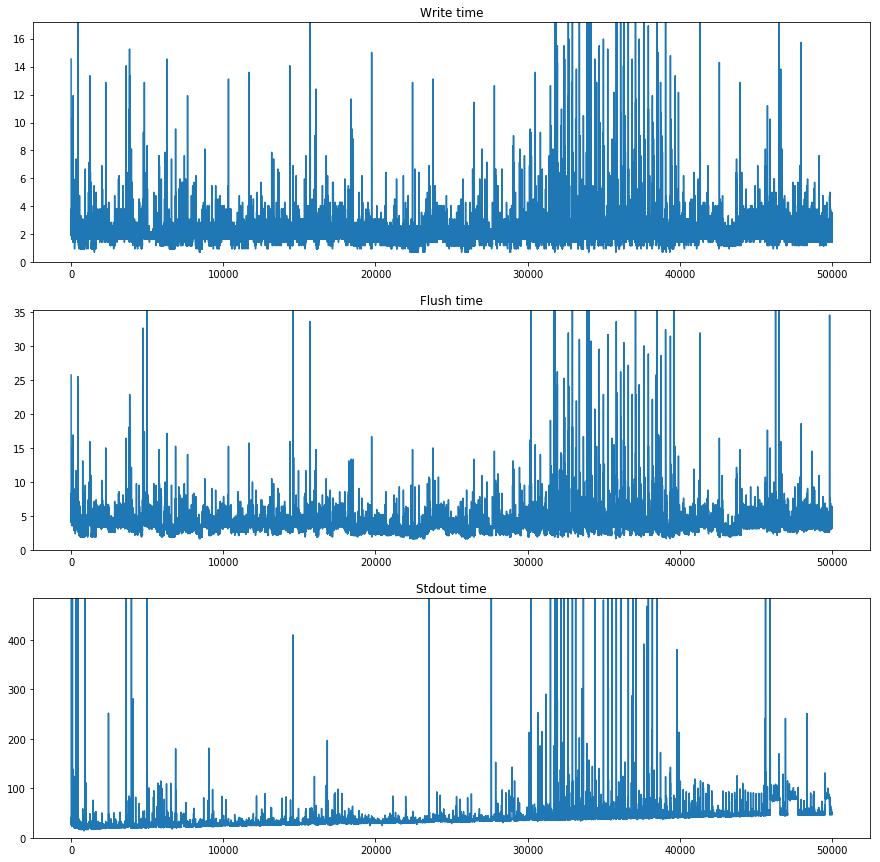

In [18]:
s1 = len(T_lst.T) -1

fig, ax = plt.subplots(s1, figsize=(15, 5*s1))
for idx, ttt in enumerate(T_lst.T[1:]):
    ax[idx].plot(ttt*F)
    ax[idx].set_ylim(0, ttt[-100:].mean() * 10 * F)

ax[0].set_title("Write time")
ax[1].set_title("Flush time")
ax[2].set_title("Stdout time")

print(T_lst[-100:,-1].mean()*F)

##### Time per step

43.392181396484375


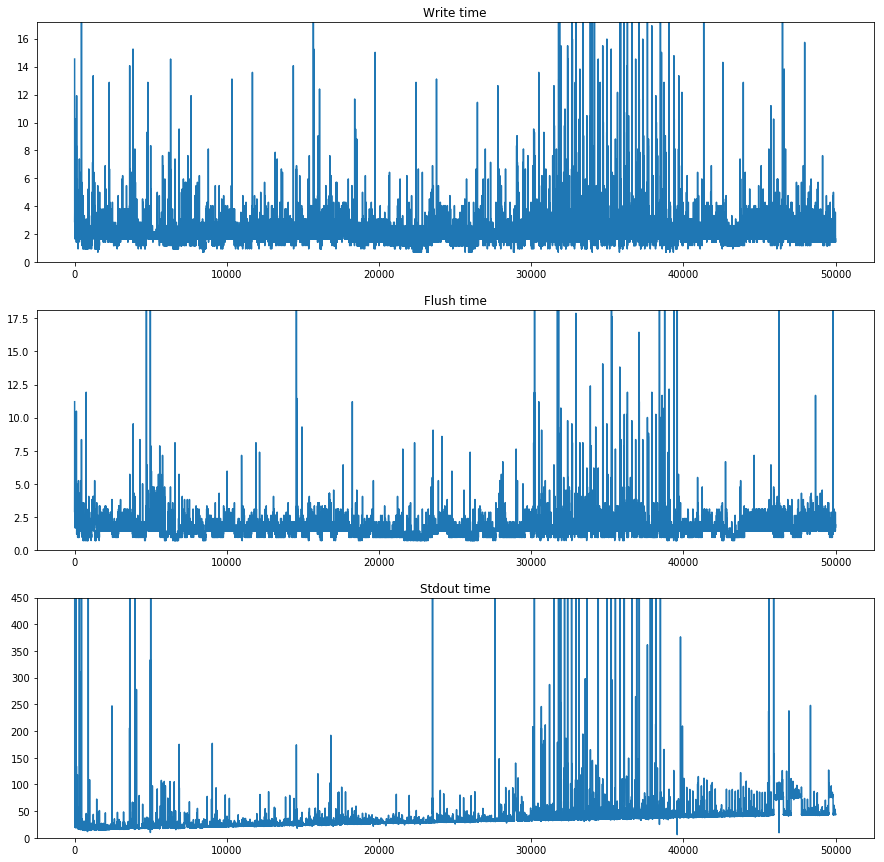

In [19]:
D_lst = np.diff(T_lst, axis=1).T

fig, ax = plt.subplots(s1, figsize=(15, 5*s1))
for idx, ttt in enumerate(D_lst):
    ax[idx].plot(ttt*F)
    ax[idx].set_ylim(0, ttt[-100:].mean() * 10 * F)

ax[0].set_title("Write time")
ax[1].set_title("Flush time")
ax[2].set_title("Stdout time")

print(D_lst[-1, -100:].min()*F)

#### Timing Summary

In [20]:
print("Ocaml time for input {}:\t  {} microsec".format(n, int(T_lst[-100:,-1].min()*F)))
print("Python time for input {}:\t  {} microsec".format(n, int(t_lst[-100:].min() * F)))

Ocaml time for input 50000:	  46 microsec
Python time for input 50000:	  2041 microsec


---

# Test IO size

**TODO**

# Test other things